In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-twodim-laplace)=
# Laplace and Poisson equations

```{index} ! Laplace equation, ! Poisson equation
```
Consider the heat equation $u_t=u_{xx}+u_{yy}$. After a long time, the distribution of temperature will stop changing. This steady-state solution must satisfy the PDE $u_{xx}+u_{yy}=0$, which is our third and final canonical PDE.

::::{proof:definition} Laplace and Poisson equations
The **Poisson equation** in two dimensions is

:::{math}
:label: poispde
u_{xx} + u_{yy} = f(x,y).
:::

A common notation for it is $\Delta u = f$, where $\Delta$ is known as the **Laplacian operator**.

The function $f$ is sometimes called a *forcing function*. If $f$ is identically zero, then {eq}`poispde` is the **Laplace equation**.
::::

```{index} elliptic PDE
```

The Laplace/Poisson equation is the archetype of an **elliptic PDE**. All linear, constant-coefficient PDEs with no higher than second derivatives can be classified as either parabolic, hyperbolic, or elliptic. No time variable appears in {eq}`poispde`. Although variable names are arbitrary, elliptic PDEs often do represent systems at steady state. 

In order to get a fully specified problem, the Laplace or Poisson equations must be complemented with a boundary condition. Because both $x$ and $y$ are spatial variables, this is our first encounter with a boundary condition that is not imposed simply at a pair of points. We consider only the Dirichlet condition $u(x,y)=g(x,y)$ around the entire boundary.

## Sylvester equation

With the unknown solution represented by its values $\mathbf{U}=\mtx(u)$ on a rectangular grid, and second-derivative finite-difference or spectral differentiation matrices $\mathbf{D}_{xx}$ and $\mathbf{D}_{yy}$, the Poisson equation {eq}`poispde` becomes the discrete equation

:::{math}
  :label: poissylvester
   \mathbf{D}_{xx}\mathbf{U} + \mathbf{U} \mathbf{D}_{yy}^T = \mathbf{F},
:::

```{index} ! Sylvester equation
```
where $\mathbf{F}=\mtx(f)$. Equation {eq}`poissylvester`, with an unknown matrix $\mathbf{U}$ multiplied on the left and right in different terms, is known as a **Sylvester equation**. We will use a new matrix operation to solve it.

## Kronecker product

```{index} ! Kronecker product
```
(definition-laplace-kron)=
::::{proof:definition} Kronecker product
Let $\mathbf{A}$ be $m\times n$ and $\mathbf{B}$ be $p\times q$. The **Kronecker product** $\mathbf{A}\otimes \mathbf{B}$ is the $mp\times nq$ matrix given by

:::{math}
    :label: krondef
    \mathbf{A}\otimes \mathbf{B} =
    \begin{bmatrix}
    A_{11} \mathbf{B} & A_{12}\mathbf{B} & \cdots & A_{1n}\mathbf{B} \\
    A_{21} \mathbf{B} & A_{22}\mathbf{B} & \cdots & A_{2n}\mathbf{B} \\
    \vdots & \vdots &  & \vdots \\
    A_{m1} \mathbf{B} & A_{m2}\mathbf{B} & \cdots & A_{mn}\mathbf{B}
    \end{bmatrix}.
:::
::::

(demo-laplace-kron)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

In [2]:
A = [1 2; -2 0]

2×2 Matrix{Int64}:
  1  2
 -2  0

In [3]:
B = [ 1 10 100; -5 5 3 ]

2×3 Matrix{Int64}:
  1  10  100
 -5   5    3

Applying the definition manually, we get

In [4]:
A_kron_B = [ A[1,1]*B  A[1,2]*B;
             A[2,1]*B  A[2,2]*B ]

4×6 Matrix{Int64}:
  1   10   100    2  20  200
 -5    5     3  -10  10    6
 -2  -20  -200    0   0    0
 10  -10    -6    0   0    0

```{index} ! Julia; kron
```

But `kron` is a built-in function.

In [5]:
kron(A,B)

4×6 Matrix{Int64}:
  1   10   100    2  20  200
 -5    5     3  -10  10    6
 -2  -20  -200    0   0    0
 10  -10    -6    0   0    0

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

The Kronecker product obeys several natural-looking identities:

(theorem-laplace-kron)=
::::{proof:theorem} Kronecker product identities
Given matrices for which the non-Kronecker operations make sense, the following hold.

1. $\mathbf{A}\otimes (\mathbf{B} + \mathbf{C})   = \mathbf{A}\otimes \mathbf{B} + \mathbf{A}\otimes \mathbf{C}$  
2. $(\mathbf{A} + \mathbf{B}) \otimes \mathbf{C}   = \mathbf{A}\otimes \mathbf{C} + \mathbf{B}\otimes \mathbf{C}$  
3. $(\mathbf{A} \otimes \mathbf{B}) \otimes \mathbf{C}   =  \mathbf{A} \otimes (\mathbf{B} \otimes \mathbf{C})$ 
4. $(\mathbf{A} \otimes \mathbf{B})^T  =  \mathbf{A}^T \otimes \mathbf{B}^T$  
5. $(\mathbf{A} \otimes \mathbf{B})^{-1}  =  \mathbf{A}^{-1} \otimes \mathbf{B}^{-1}$  
6. $(\mathbf{A} \otimes \mathbf{B})(\mathbf{C}\otimes \mathbf{D})  =  (\mathbf{A}\mathbf{C}) \otimes (\mathbf{B}\mathbf{D})$

For the vec operation defined in {numref}`Definition {number} <definition-diffadv-vec>` and matrices of compatible sizes, 

:::{math}
:label: vecidentity
\operatorname{vec}(\mathbf{A}\mathbf{B}\mathbf{C}^T) = ({\mathbf{C}}\otimes {\mathbf{A}})\operatorname{vec}(\mathbf{B}).
:::
::::

::::{proof:proof}
(Partial proof.) These all boil down to algebraic manipulations. For instance, for item 5, let $\mathbf{Z}=\mathbf{A}^{-1}$. Then

$$
\bigl(\mathbf{A} \otimes \mathbf{B}\bigr) \bigl(\mathbf{A}^{-1} \otimes \mathbf{B}^{-1}\bigr) &=     \begin{bmatrix}
    A_{11} \mathbf{B} & A_{12}\mathbf{B} & \cdots & A_{1n}\mathbf{B} \\
    A_{21} \mathbf{B} & A_{22}\mathbf{B} & \cdots & A_{2n}\mathbf{B} \\
    \vdots & \vdots &  & \vdots \\
    A_{n1} \mathbf{B} & A_{n2}\mathbf{B} & \cdots & A_{n n}\mathbf{B}
    \end{bmatrix} \,     \begin{bmatrix}
    Z_{11} \mathbf{B}^{-1} & Z_{12}\mathbf{B}^{-1} & \cdots & Z_{1n}\mathbf{B}^{-1} \\
    Z_{21} \mathbf{B}^{-1} & Z_{22}\mathbf{B}^{-1} & \cdots & Z_{2n}\mathbf{B}^{-1} \\
    \vdots & \vdots &  & \vdots \\ 
    Z_{n1} \mathbf{B}^{-1} & Z_{n2}\mathbf{B}^{-1} & \cdots & Z_{n n}\mathbf{B}^{-1}
    \end{bmatrix}  \\[1mm]
  &= \begin{bmatrix}
    (A_{11} Z_{11} + \cdots +  A_{1n}Z_{n1})\mathbf{I}_n & \cdots & (A_{11} Z_{1n} + \cdots +  A_{1n}Z_{n n})\mathbf{I}_n \\
    \vdots &  & \vdots \\
    (A_{n1} Z_{11} + \cdots +  A_{n n}Z_{n1})\mathbf{I}_n & \cdots & (A_{n1} Z_{1n} + \cdots +  A_{n n}Z_{n n})\mathbf{I}_n
    \end{bmatrix} \\ & = (\mathbf{A}\mathbf{Z}) \otimes \mathbf{I}_n \\ & = \mathbf{I}_{2n}.
$$
::::

## Poisson as a linear system

We can use {eq}`vecidentity` to express the Sylvester form {eq}`poissylvester` of the discrete Poisson equation as an ordinary linear system. First, we pad {eq}`poissylvester` with identity matrices,

$$
\mathbf{D}_{xx}\mathbf{U} \mathbf{I}_{y} + \mathbf{I}_{x} \mathbf{U} \mathbf{D}_{yy}^T = \mathbf{F},
$$

where $\mathbf{I}_{x}$ and $\mathbf{I}_{y}$ are the $(m+1)\times (m+1)$ and $(n+1)\times (n+1)$ identities, respectively. Upon taking the vec of both sides and applying {eq}`vecidentity`, we obtain

:::{math}
:label: poiskronpde
\underbrace{\bigl[ ({\mathbf{I}_{y}} \otimes {\mathbf{D}_{xx}}) + ({\mathbf{D}_{yy}}\otimes {\mathbf{I}_{x}})\bigr]}_{\mathbf{A}} \, \underbrace{\operatorname{vec}(\mathbf{U})}_{\mathbf{u}} &=
  \underbrace{\operatorname{vec}(\mathbf{F})}_{\mathbf{b}}  \\[1mm] \mathbf{A} \mathbf{u} &= \mathbf{b}.
:::

This is in the form of a standard linear system in $(m+1)(n+1)$ variables. 

Boundary conditions of the PDE must yet be applied to modify {eq}`poiskronpde`. As has been our practice for one-dimensional boundary-value problems, we replace the collocation equation for the PDE at each boundary point with an equation that assigns that boundary point its prescribed value. The details are a bit harder to express algebraically in the two-dimensional geometry, though, than in the 1D case. 

Say that $N=(m+1)(n+1)$ is the number of entries in the unknown $\mathbf{U}$, and let $B$ be a subset of $\{1,\dots,N\}$ such that $i\in B$ if and only if $(x_i,y_i)$ is on the boundary. Then for each $i\in B$, we want to replace row $i$ of the system $\mathbf{A}\mathbf{u}=\mathbf{b}$ with the equation

$$
  %:label: pois2bcrep
  \mathbf{e}_i^T \mathbf{u} = g(x_i,y_i).
$$

Hence from $\mathbf{A}$ we should subtract away its $i$th row and add $\mathbf{e}_i^T$ back in. When this is done for all $i\in B$, the result is the replacement of the relevant rows of $\mathbf{A}$ with relevant rows of the identity:

:::{math}
  :label: pois2bcrep
  \tilde{\mathbf{A}} = \mathbf{A} - \mathbf{I}_B\mathbf{A} +\mathbf{I}_B,
:::

where $\mathbf{I}_B$ is a matrix with zeros everywhere except for ones at $(i,i)$ for all $i\in B$. A similar expression can be derived for the modification of $\mathbf{b}$. However, rather than implementing a literal interpretation of {eq}`pois2bcrep`, the changes to $\mathbf{A}$ and $\mathbf{b}$ are made more easily through logical indexing. A small example is more illuminating than further description.

(demo-laplace-fd)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```


Here is a forcing function for Poisson's equation.

In [6]:
f = (x,y) -> x^2 - y + 2;

We make a crude discretization for illustrative purposes.

In [7]:
m,n = 6,5
x,Dx,Dxx = FNC.diffmat2(m,[0,3])
y,Dy,Dyy = FNC.diffmat2(n,[-1,1])
unvec = u -> reshape(u,m+1,n+1);

Next, we evaluate $\phi$ on the grid.

In [8]:
F = [ f(x,y) for x in x, y in y ]

7×6 Matrix{Float64}:
  3.0    2.6    2.2    1.8    1.4    1.0
  3.25   2.85   2.45   2.05   1.65   1.25
  4.0    3.6    3.2    2.8    2.4    2.0
  5.25   4.85   4.45   4.05   3.65   3.25
  7.0    6.6    6.2    5.8    5.4    5.0
  9.25   8.85   8.45   8.05   7.65   7.25
 12.0   11.6   11.2   10.8   10.4   10.0

Here are the equations for the PDE collocation, before any modifications are made for the boundary conditions.

In [9]:
A = kron(I(n+1),Dxx) + kron(Dyy,I(m+1))
b = vec(F);

The number of equations is equal to $(m+1)(n+1)$, which is the total number of points on the grid.

In [10]:
@show N = length(F);

N = length(F) = 42


The combination of Kronecker products and finite differences produces a characteristic sparsity pattern.

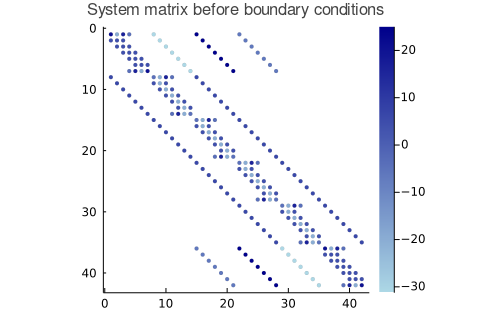

In [11]:
spy(sparse(A),color=:blues,m=3,
    title="System matrix before boundary conditions")

We now construct a Boolean array the same size as `F` to indicate where the boundary points lie in the grid.

In [12]:
isboundary = trues(m+1,n+1)
isboundary[2:m,2:n] .= false
idx = vec(isboundary);

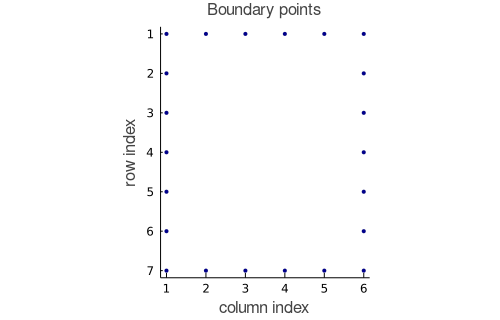

In [13]:
spy(sparse(isboundary),m=3,color=:darkblue,legend=:none,
    title="Boundary points",
    xaxis=("column index",[0,n+2]),yaxis=("row index",[0,m+2]) )

In order to impose Dirichlet boundary conditions, we replace the boundary rows of the system by rows of the identity.

In [14]:
I_N = I(N)
A[idx,:] .= I_N[idx,:];     # Dirichlet conditions

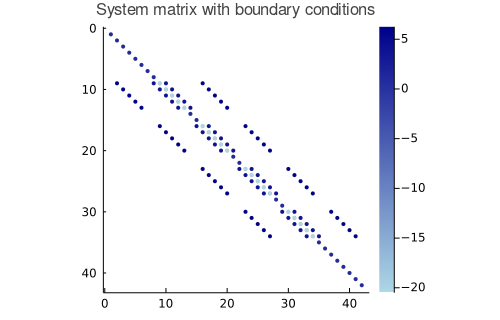

In [15]:
spy(sparse(A),color=:blues,m=3,
    title="System matrix with boundary conditions")    

Finally, we must replace the rows in the vector $\mathbf{b}$ by the boundary values being assigned to the boundary points. Here, we let the boundary values be zero everywhere.

In [16]:
b[idx] .= 0;                 # Dirichlet values

Now we can solve for $\mathbf{u}$ and reinterpret it as the matrix-shaped $\mathbf{U}$, the solution on our grid.

In [17]:
u = A\b
U = unvec(u)

7×6 Matrix{Float64}:
  0.0           0.0        4.23103e-16  -1.27734e-15   1.96159e-15  0.0
 -2.84217e-16  -0.549304  -0.758277     -0.712098     -0.453391     0.0
  1.06581e-15  -0.917873  -1.30273      -1.24377      -0.798473     0.0
  2.06057e-15  -1.21928   -1.74064      -1.67911      -1.09539      0.0
  7.67386e-15  -1.39869   -1.97682      -1.91786      -1.27929      0.0
  5.68434e-15  -1.21024   -1.65843      -1.61225      -1.11433      0.0
  0.0           0.0       -1.9111e-15    2.57711e-15   0.0          0.0

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```


## Implementation

{numref}`Function {number} <function-poissonfd>` is our code to solve the Poisson equation.

(function-poissonfd)=
````{proof:function} poissonfd
**Solve Poisson's equation by finite differences**
```{code-block} julia1
:lineno-start: 1
"""
    poissonfd(f,g,m,xspan,n,yspan)

Solve Poisson's equation on a rectangle by finite differences.
Function `f` is the forcing function and function `g` gives the
Dirichlet boundary condition. The rectangle is the tensor product of
intervals `xspan` and `yspan`,  and the discretization uses `m`+1
and `n`+1 points in the two coordinates.

Returns vectors defining the grid and a matrix of grid solution values.
"""
function poissonfd(f,g,m,xspan,n,yspan)
    # Discretize the domain.
    x,Dx,Dxx = FNC.diffmat2(m,xspan)
    y,Dy,Dyy = FNC.diffmat2(n,yspan)
    mtx = h -> [ h(x,y) for x in x, y in y ]
    X,Y = mtx((x,y)->x),mtx((x,y)->y)
    N = (m+1)*(n+1)   # total number of unknowns

    # Form the collocated PDE as a linear system.
    A = kron(I(n+1),sparse(Dxx)) + kron(sparse(Dyy),I(m+1))
    b = vec( mtx(f) )

    # Identify boundary locations.
    isboundary = trues(m+1,n+1)
    isboundary[2:m,2:n] .= false
    idx = vec(isboundary)

    # Apply Dirichlet condition.
    scale = maximum(abs,A[n+2,:])
    A[idx,:] = scale * I(N)[idx,:]        # Dirichlet assignment
    b[idx] = scale * g.(X[idx],Y[idx])    # assigned values

    # Solve the linear system and reshape the output.
    u = A\b
    U = reshape(u,m+1,n+1)
    return x,y,U
end
```
````

We use {numref}`Demo %s <demo-laplace-fd>` as a template: create the linear system, modify it for the boundary conditions, solve it using backslash, and reshape to get a grid function. The matrix is $N=(m+1)(n+1)$ on each side and very sparse, so we take care to use sparse matrices in the code to exploit that structure. There is a small but important change from {numref}`Demo %s <demo-laplace-fd>`: the boundary conditions are rescaled to read $\sigma u(x,y)=\sigma g(x,y)$, where $\sigma$ is the largest element of a row of $\mathbf{A}$. This tweak improves the condition number of the final matrix.

(demo-laplace-poisson)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We can engineer an example by choosing the solution first. Let $u(x,y)=\sin(3xy-4y)$. Then one can derive $f=\Delta u = -\sin(3xy-4y)\bigl(9y^2+(3x-4)^2\bigr)$ for the forcing function and use $g=u$ on the boundary.

First we define the problem on $[0,1]\times[0,2]$.

In [18]:
f = (x,y) -> -sin(3*x*y-4*y)*(9*y^2+(3*x-4)^2);
g = (x,y) -> sin(3*x*y-4*y);
xspan = [0,1];  yspan = [0,2];

Here is the finite-difference solution.

In [19]:
x,y,U = FNC.poissonfd(f,g,40,xspan,60,yspan);

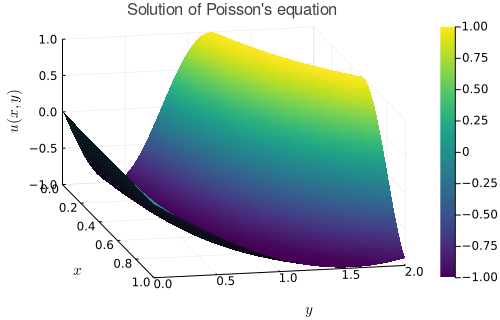

In [20]:
surface(x,y,U',color=:viridis,
    title="Solution of Poisson's equation",      
    xaxis=(L"x"),yaxis=(L"y"),zaxis=(L"u(x,y)"),
    right_margin=3Plots.mm,camera=(70,50))    

The error is a smooth function of $x$ and $y$. It must be zero on the boundary; otherwise, we have implemented boundary conditions incorrectly.

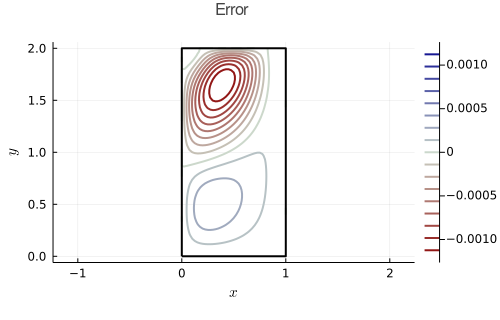

In [21]:
error = [g(x,y) for x in x, y in y] - U;
M = maximum(abs,error)
contour(x,y,error',levels=17,aspect_ratio=1,
    clims=(-M,M),color=:redsblues,colorbar=:bottom,
    title="Error",xaxis=(L"x"),yaxis=(L"y"),
    right_margin=7Plots.mm)
plot!([0,1,1,0,0],[0,0,2,2,0],l=(2,:black))

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Accuracy and efficiency

In {numref}`Function {number} <function-poissonfd>` we used second-order finite differences for the discretization. Let's simplify the discussion by assuming that $m=n$. The error in the solution can be expected to be $O(n^{-2})$. 

The matrix $\mathbf{A}$ has size $N=O(n^2)$. The upper and lower bandwidths of the matrix $\mathbf{A}$ are both $O(n)$. It can be shown that the matrix is symmetric and negative definite, so sparse Cholesky factorization can be applied to $-\mathbf{A}$, taking $O(n^2N)=O(n^4)$ operations. 

As $n$ increases, the truncation error decreases while the operation count increases. The growth in operations is faster than the corresponding decrease in error, making it costly to get high accuracy. Suppose we have fixed running time $T$ at our disposal. Then $n=O(T^{1/4})$, and the convergence is $O(1/\sqrt{T})$. For example, reduction of the error by a factor of 10 requires 100 times the computational effort. 

If we chose a Chebyshev spectral discretization instead, the calculus changes. Provided that the solution is smooth, we expect convergence at a rate $K^{-n}$ for some $K>1$. However, the system matrix is no longer sparse nor symmetric, and solution by LU factorization takes $O(N^3)=O(n^6)$ flops. Hence as a function of running time $T$, we expect a convergence rate on the order of $K^{-T^{1/6}}$. It's not simple to compare this directly to the finite-difference case. In the long run, the spectral method will be much more efficient, but if the accuracy requirement is undemanding, second-order finite differences may be faster. For the specific case of Poisson's equation on a rectangle, there are specialized fast solution methods that are beyond the scope of this discussion.


## Exercises

1. ✍ Using general $2\times 2$ matrices, verify identities 4 and 6 in {numref}`Theorem {number} <theorem-laplace-kron>`. 

    (problem-laplace-symmetry)=
2. ✍ Prove that the matrix $\mathbf{A}$ defined in {eq}`poiskronpde` is symmetric if $\mathbf{D}_{xx}$ and $\mathbf{D}_{yy}$ are symmetric. 

    (problem-laplace-usage)=
3. ⌨  Use {numref}`Function {number} <function-poissonfd>` to solve the following problems on $[0,1]\times[0,1]$ using $m=n=50$. In each case, make a plot of the solution and a plot of the error. 

    **(a)** $u_{xx}+u_{yy} = 2x^2[x^2(x-1)+(10x-6)(y^2-y)]$, with $u=0$ on the boundary.  
    
    Solution: $u(x,y) = x^4(1-x)y(1-y)$.
    
    **(b)** $u_{xx}+u_{yy} = \left(16 x^2 + (1-4 y)^2\right) \sinh (4 x y-x)$,  with $u=\sinh(4xy-x)$ on the boundary. 
    
    Solution: $u(x,y) = \sin(4\pi x))$.
    
    **(c)** $u_{xx}+u_{yy} = -(20\pi^2) \sin (4\pi x) \cos (2\pi y)$, with $u = \sin (4\pi x) \cos (2\pi y)$ on the boundary.  
    
    Solution: $u(x,y) = \sin (4\pi x) \cos (2\pi y)$.

4. ⌨ For each case in Exercise 3, solve the problem using  {numref}`Function {number} <function-poissonfd>` with $m=n=20,30,40,\ldots,120$. For each numerical solution compute the maximum absolute error on the grid. On a log-log plot, compare the convergence of the error as a function of $n$ to theoretical second-order accuracy.    

5. ⌨ Copy {numref}`Function {number} <function-poissonfd>` to a new function named `poischeb`, and modify it to use a Chebyshev discretization rather than finite differences. For each item in [Exercise 3](problem-laplace-usage), solve the problem using `poischeb` for $m=n=10,15,20,\ldots,40$. For each numerical solution compute the maximum absolute error on the grid. Show the convergence of the error as a function of $n$ on a log-linear plot.

6. ⌨ Sometimes boundary conditions are specified using a piecewise definition, with a different formula for each side of the domain. Use {numref}`Function {number} <function-poissonfd>` with $m=n=60$ to solve the Laplace equation on $[0,1]^2$ with boundary conditions 

    $$
    u(0,y) = u(1,y) \equiv 0, \quad u(x,0) = \sin(3\pi x), \quad u(x,1) = e^{2x}(x-x^2).
    $$

    Make a surface plot of your numerical solution.